Attribute Information:

    1) ID number
    2) Diagnosis (M = malignant, B = benign)

-3-32.Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter)
    b) texture (standard deviation of gray-scale values)
    c) perimeter
    d) area
    e) smoothness (local variation in radius lengths)
    f) compactness (perimeter^2 / area - 1.0)
    g). concavity (severity of concave portions of the contour)
    h). concave points (number of concave portions of the contour)
    i). symmetry
    j). fractal dimension ("coastline approximation" - 1)

convave ->凹み

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

For this analysis, as a guide to predictive analysis I followed the instructions and discussion on "A Complete Tutorial on Tree Based Modeling from Scratch (in R & Python)" at Analytics Vidhya.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# keeps the plots in one place. calls image as static pngs
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import mpld3 as mpl

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics


import graphviz
import pydot

/Users/Toshiaki/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv("data.csv",header = 0)
df


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,NaN


In [3]:
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)
# size of the dataframe
len(df)

569

In [13]:
for i in df:
    print(i)

diagnosis
radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst


In [14]:
for variable in df:
    print(df[variable].unique())

[1 0]
[17.99  20.57  19.69  11.42  20.29  12.45  18.25  13.71  13.    12.46
 16.02  15.78  19.17  15.85  13.73  14.54  14.68  16.13  19.81  13.54
 13.08   9.504 15.34  21.16  16.65  17.14  14.58  18.61  15.3   17.57
 18.63  11.84  17.02  19.27  16.74  14.25  13.03  14.99  13.48  13.44
 10.95  19.07  13.28  13.17  18.65   8.196 12.05  13.49  11.76  13.64
 11.94  18.22  15.1   11.52  19.21  14.71  13.05   8.618 10.17   8.598
  9.173 12.68  14.78   9.465 11.31   9.029 12.78  18.94   8.888 17.2
 13.8   12.31  16.07  13.53  18.05  20.18  12.86  11.45  13.34  25.22
 19.1   12.    18.46  14.48  19.02  12.36  14.64  14.62  15.37  13.27
 13.45  15.06  20.26  12.18   9.787 11.6   14.42  13.61   6.981  9.876
 10.49  13.11  11.64  22.27  11.34   9.777 12.63  14.26  10.51   8.726
 11.93   8.95  14.87  17.95  11.41  18.66  24.25  14.5   13.37  13.85
 19.    19.79  12.19  15.46  16.16  15.71  18.45  12.77  11.71  11.43
 14.95  11.28   9.738 16.11  12.9   10.75  11.9   11.8   14.44  13.74
  8.219  9.7

In [5]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.describe()  # basic statistic #, mean,sd ,min ,25,75,max points. 

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


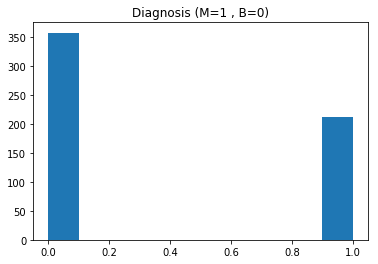

In [15]:
df.describe()
plt.hist(df['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

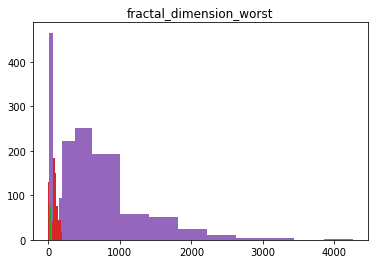

In [17]:
for variable in df:
    plt.hist(df[variable])
    plt.title(variable)
plt.show()

In [238]:
features_name = df.columns[1:11]
dfM = df[df["diagnosis"] == 1]
dfB = df[df["diagnosis"] == 0]

/Users/Toshiaki/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


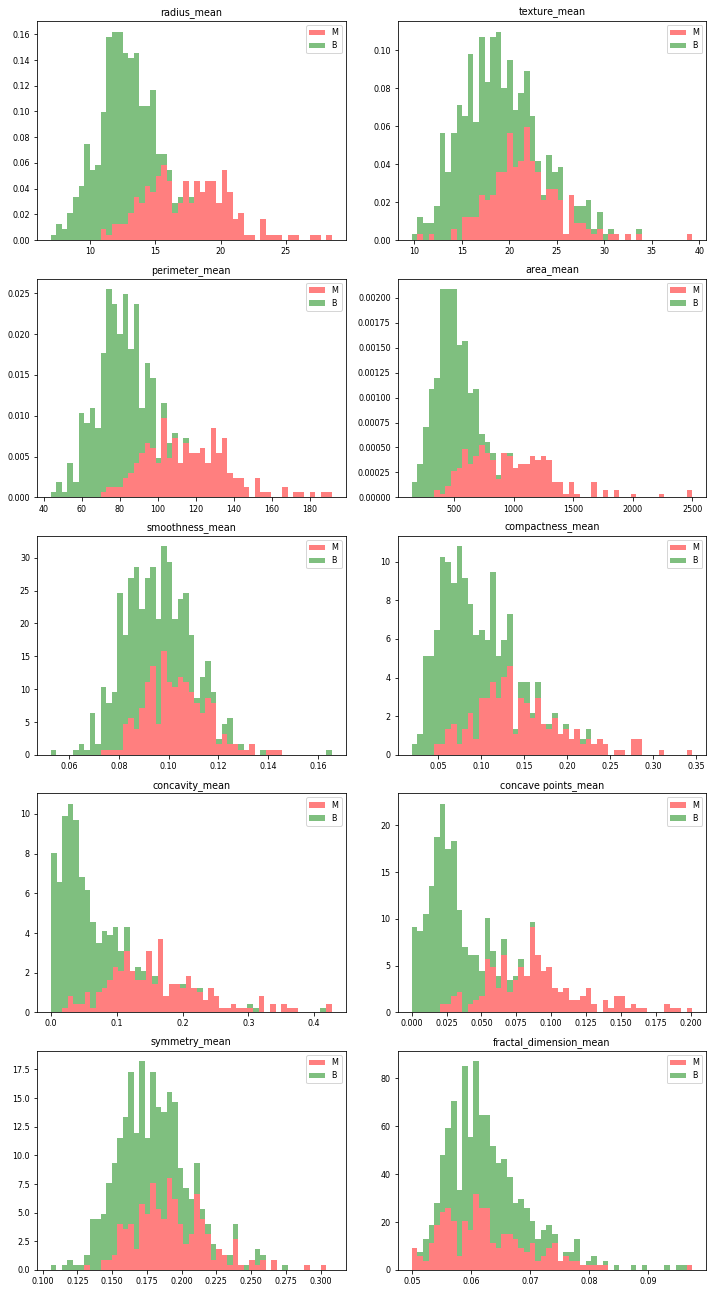

In [239]:
#stack the data 
plt.rcParams.update({"font.size":8})
fig, axes = plt.subplots(nrows=5,ncols=2,figsize=(10,18))

axes = axes.ravel() # 5*2 list data
for idx,ax in enumerate(axes):
    ax.figure
    binwidth = (max(df[features_name[idx]]) - min(df[features_name[idx]]))/50
    ax.hist( [dfM[features_name[idx]], dfB[features_name[idx]]] ,
        bins=np.arange(min(df[features_name[idx]]) ,max(df[features_name[idx]])+binwidth,binwidth), 
        alpha = 0.5,stacked=True, normed= True,label=["M","B"],color=["r","g"])
    ax.legend(loc="upper right")
    ax.set_title(features_name[idx])
plt.tight_layout()
plt.show()



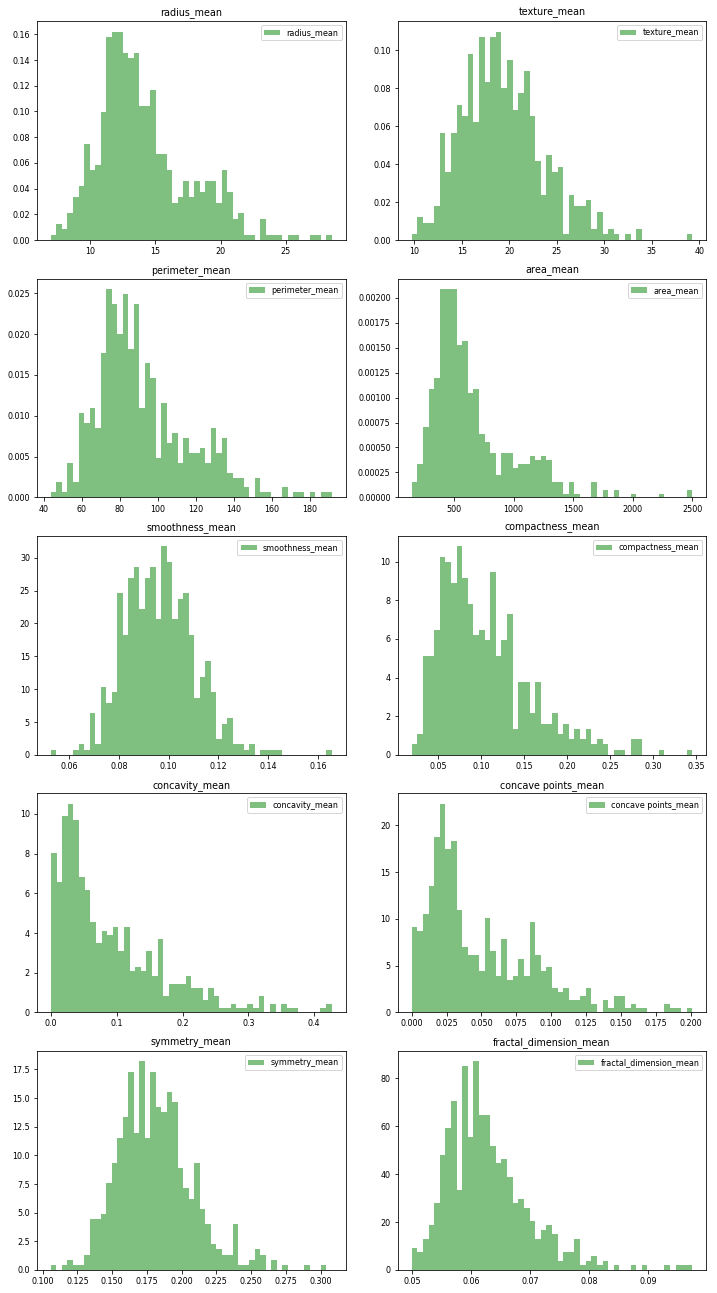

In [27]:
features_name = df.columns[1:11]

#stack the data 
plt.rcParams.update({"font.size":8})
fig, axes = plt.subplots(nrows=5,ncols=2,figsize=(10,18))

axes = axes.ravel() # 5*2 list data
for idx,ax in enumerate(axes):
    ax.figure
    binwidth = (max(df[features_name[idx]]) - min(df[features_name[idx]]))/50
    ax.hist(df[features_name[idx]],
        bins=np.arange(min(df[features_name[idx]]) ,max(df[features_name[idx]])+binwidth,binwidth), 
        alpha = 0.5,stacked=True, normed= True,color="g")
    ax.legend(loc="upper right")
    ax.set_title(features_name[idx])
plt.tight_layout()
plt.show()




mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used 
in classification of the cancer. 


going to bulid model 

In [248]:
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
df[predictor_var].head()
print (int( len(df)/2 ) )

284


In [294]:
#Generic function for making a classification model and accessing the performance. 
# From AnalyticsVidhya tutorial
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors][:int(len(df)/2)] ,data[outcome][:int(len(df)/2)])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors][int(len(df)/2): ])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome][int(len(df)/2): ])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
        # .iloc means row number,  .loc
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

Logistic Regression model

In [254]:
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
outcome_var='diagnosis'
model=LogisticRegression()
classification_model(model,df,predictor_var,outcome_var)

Accuracy : 90.877%
Cross-Validation Score : 78.070%
Cross-Validation Score : 82.018%
Cross-Validation Score : 86.550%
Cross-Validation Score : 87.939%
Cross-Validation Score : 89.112%


In [295]:
# try to check using one variables 
predictor_var = ['radius_mean']
model=LogisticRegression()
classification_model(model,df,predictor_var,outcome_var)

Accuracy : 85.263%
Cross-Validation Score : 71.930%
Cross-Validation Score : 78.070%
Cross-Validation Score : 84.503%
Cross-Validation Score : 86.404%
Cross-Validation Score : 87.353%


Decision Tree model

In [296]:
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
model = DecisionTreeClassifier()
classification_model(model,df,predictor_var,outcome_var)

Accuracy : 90.175%
Cross-Validation Score : 83.333%
Cross-Validation Score : 85.965%
Cross-Validation Score : 87.719%
Cross-Validation Score : 89.035%
Cross-Validation Score : 89.458%


In [257]:
predictor_var = ['radius_mean']
model = DecisionTreeClassifier()
classification_model(model,df,predictor_var,outcome_var)

Accuracy : 80.000%
Cross-Validation Score : 75.439%
Cross-Validation Score : 76.316%
Cross-Validation Score : 81.287%
Cross-Validation Score : 81.798%
Cross-Validation Score : 81.899%


In [258]:
# show tree as graph
export_graphviz(model,out_file="tree.dot",class_names=["malignant","benign"],
                feature_names=predictor_var,impurity=False,filled=True)
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
(graph,) = pydot.graph_from_dot_file("tree.dot")
graph.write_png("tree.png")

Random Forest

In [308]:
predictor_var = features_name
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=3)
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 92.632%
Cross-Validation Score : 85.965%
Cross-Validation Score : 89.035%
Cross-Validation Score : 91.520%
Cross-Validation Score : 92.105%
Cross-Validation Score : 92.799%


In [309]:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

concave points_mean       0.320113
perimeter_mean            0.185705
area_mean                 0.165951
concavity_mean            0.137998
radius_mean               0.085573
texture_mean              0.041307
compactness_mean          0.040627
smoothness_mean           0.011367
fractal_dimension_mean    0.007435
symmetry_mean             0.003924
dtype: float64


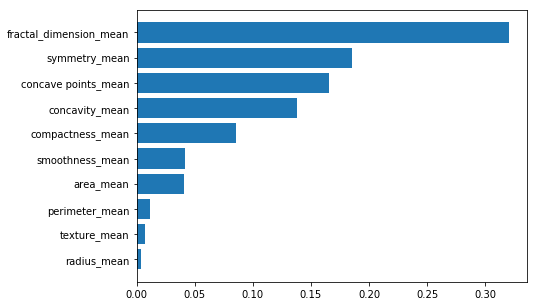

In [318]:
from pylab import rcParams
rcParams['figure.figsize'] = 7,5

a = model.feature_importances_.argsort()
model.feature_importances_[a]

# make the graph

plt.barh(range(len(a)) ,model.feature_importances_[a],align="center")
plt.yticks(np.arange(len(a)),features_name)
plt.xlabel = "Importance Feature"
plt.ylabel = "Feature"
plt.show()


In [262]:
# Using top 5 features
predictor_var = ['concave points_mean','area_mean','radius_mean','perimeter_mean','concavity_mean',]
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=2)
classification_model(model,df,predictor_var,outcome_var)

Accuracy : 93.333%
Cross-Validation Score : 84.211%
Cross-Validation Score : 87.719%
Cross-Validation Score : 91.228%
Cross-Validation Score : 91.667%
Cross-Validation Score : 92.271%
